# Economic Data Analysis with Fred & Pandas

This is an example of how to pull data, visualize and discover insights using python pandas.

We will be using data from Federal Reserve Economic Data (FRED), which is an online database consisting of hundreds of thousands of economic data time series from a multitude of sources.

Fred is not available by default within jupyter notebook but we will install the fredapi using the pip command seen below.

In [ ]:
!pip install fredapi

Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

# Request Fred API Key from:
# https://fred.stlouisfed.org/docs/api/fred/#API
fred_key = 'Your key here'

1. Create the Fred object

In [ ]:
fred = Fred(api_key=fred_key)

2. Search for economic data

In [7]:
sp_search1 = fred.search('SP', order_by='popularity') # https://fred.stlouisfed.org/series/SP500
sp_search1.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2022-06-09,2022-06-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-05-31 08:02:01-05:00,91,"For more information regarding the index, plea..."
SP500,SP500,2022-06-09,2022-06-09,S&P 500,2012-06-11,2022-06-08,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-06-08 19:10:58-05:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2022-06-09,2022-06-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-05-31 08:02:02-05:00,80,"For more information regarding the index, plea..."
DJIA,DJIA,2022-06-09,2022-06-09,Dow Jones Industrial Average,2012-06-11,2022-06-08,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-06-08 19:13:07-05:00,74,The observations for the Dow Jones Industrial ...
SPCS20RSA,SPCS20RSA,2022-06-09,2022-06-09,S&P/Case-Shiller 20-City Composite Home Price ...,2000-01-01,2022-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-05-31 08:02:03-05:00,72,"For more information regarding the index, plea..."


In [8]:
sp_search2 = fred.search('T5YIE') # 5-Year Breakeven Inflation Rate https://fred.stlouisfed.org/series/T5YIE
sp_search2.head()

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
T5YIE,Daily,D,T5YIE,2022-06-08 16:01:13-05:00,The breakeven inflation rate represents a meas...,2022-06-08,2003-01-02,89,2022-06-09,2022-06-09,Not Seasonally Adjusted,NSA,5-Year Breakeven Inflation Rate,Percent,%


3. Pull Raw Data & Plot

<AxesSubplot:title={'center':'S&P 500'}>

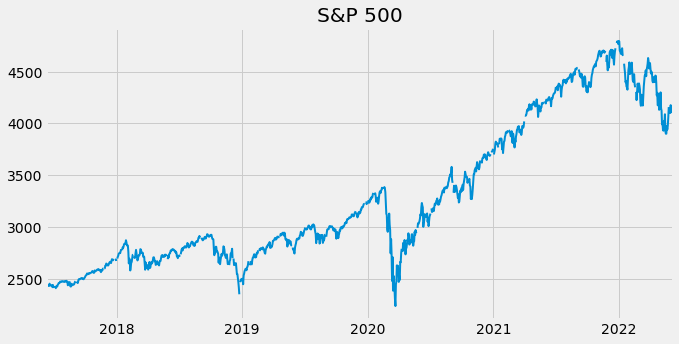

In [9]:
sp500 = fred.get_series(series_id='SP500', observation_start='6/8/2017', observation_end='6/8/2022')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

<AxesSubplot:title={'center':'5-Year Breakeven Inflation Rate'}>

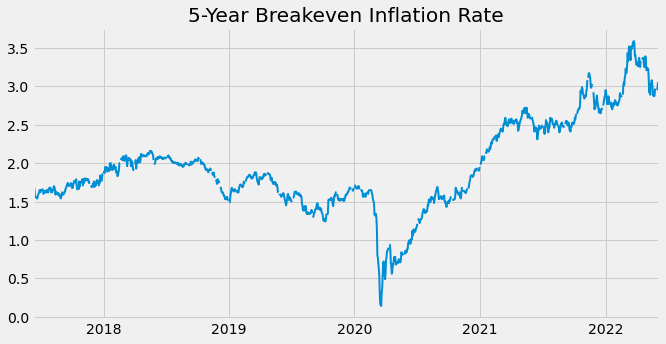

In [10]:
t5yinflation = fred.get_series(series_id='T5YIE', observation_start='6/8/2017',  observation_end='6/8/2022')
t5yinflation.plot(figsize=(10, 5), title='5-Year Breakeven Inflation Rate', lw=2)

4. Plot both data series together

Text(0.5, 1.0, 'S&P 500 Index compared to Inflation Rate')

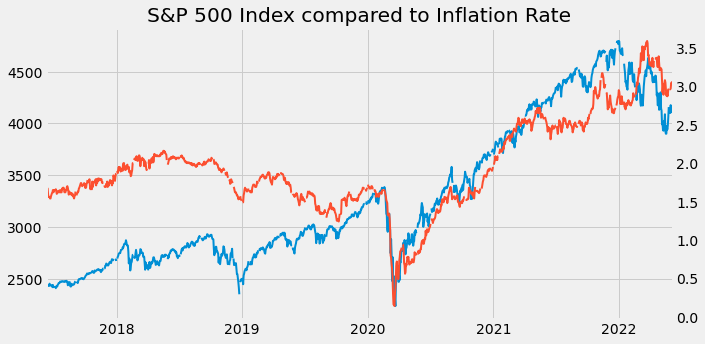

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
sp500.plot(figsize=(10, 5), ax=ax, label='S&P 500', lw=2)
t5yinflation.plot(ax=ax2, label='Inflation', color=color_pal[1], lw=2)
ax2.grid(False) # Turn grid off on second line
ax.set_title('S&P 500 Index compared to Inflation Rate')